In [1]:
from sympy import symbols, diff, Eq, solve
import pickle

In [2]:
def c1_symbolic():
    # Define the symbol for phi and the coefficients a_n^(1)
    phi = symbols('phi')
    a = symbols('a1:8')

    # The potential V for Class C1 with n=1 to 7, but since a_1 is given to be 0, we start from n=2
    V = sum([a[n] * phi**(n+1) for n in range(7)])

    # Since we need to find the coefficients for when V has a local maximum at phi=phi0,
    # we need to set the first derivative of V to 0 at phi=phi0 (for a local extremum)
    # and the second derivative of V to be less than 0 (for a local maximum).

    # Let's assume that we have values for phi0, phi1_minus, phi1_plus, and phi2 from the user
    # For this example, let's use arbitrary values that satisfy the conditions mentioned.
    V_max = symbols('V_max')
    phi0 = symbols('phi_0')
    phi1n = symbols('phi_1n')
    phi1p = symbols('phi_1p')
    phi2 = symbols('phi_2')

    # The first and second derivatives of V
    Vp = diff(V, phi)
    Vpp = diff(Vp, phi)
    Vppp = diff(Vpp, phi)

    # Setting up equations based on the conditions given in the appendix

    # Create the equations based on the conditions
    eq1 = Eq(V.subs(phi, 1), -1)
    eq2 = Eq(Vp.subs(phi, phi0), 0)
    eq3 = Eq(Vp.subs(phi, 1), 0)
    eq4 = Eq(Vpp.subs(phi, phi1n), 0)
    eq5 = Eq(Vpp.subs(phi, phi1p), 0)
    eq6 = Eq(Vppp.subs(phi, phi2), 0)

    # We also know that a_1 = 0, so we can replace a_1 with 0 in our equations
    eq1 = eq1.subs(a[0], 0)
    eq2 = eq2.subs(a[0], 0)
    eq3 = eq3.subs(a[0], 0)
    eq4 = eq4.subs(a[0], 0)
    eq5 = eq5.subs(a[0], 0)
    eq6 = eq6.subs(a[0], 0)

    # Solve the system of equations for the coefficients
    solutions = solve((eq1, eq2, eq3, eq4, eq5, eq6), (a[1], a[2], a[3], a[4], a[5], a[6]))

    V = V.subs(solutions)
    V = V.subs(a[0], 0)
    return V, phi, phi0, phi1n, phi1p, phi2
    

In [12]:
V, phi, phi0, phi1n, phi1p, phi2 = c1_symbolic()

In [15]:
# simplify the expression
V = V.simplify()
str(V)

'phi**2*(phi**5*(-720*phi_0**3*phi_1n**2*phi_1p**2 + 1440*phi_0**3*phi_1n**2*phi_1p*phi_2 - 720*phi_0**3*phi_1n**2*phi_2 + 240*phi_0**3*phi_1n**2 + 1440*phi_0**3*phi_1n*phi_1p**2*phi_2 - 2160*phi_0**3*phi_1n*phi_1p*phi_2**2 - 720*phi_0**3*phi_1n*phi_1p*phi_2 + 240*phi_0**3*phi_1n*phi_1p + 1080*phi_0**3*phi_1n*phi_2**2 - 180*phi_0**3*phi_1n - 720*phi_0**3*phi_1p**2*phi_2 + 240*phi_0**3*phi_1p**2 + 1080*phi_0**3*phi_1p*phi_2**2 - 180*phi_0**3*phi_1p - 720*phi_0**3*phi_2**2 + 360*phi_0**3*phi_2 + 900*phi_0**2*phi_1n**3*phi_1p**2 - 1800*phi_0**2*phi_1n**3*phi_1p*phi_2 + 900*phi_0**2*phi_1n**3*phi_2 - 300*phi_0**2*phi_1n**3 + 900*phi_0**2*phi_1n**2*phi_1p**3 - 1800*phi_0**2*phi_1n**2*phi_1p**2*phi_2 - 720*phi_0**2*phi_1n**2*phi_1p**2 + 2340*phi_0**2*phi_1n**2*phi_1p*phi_2 - 300*phi_0**2*phi_1n**2*phi_1p - 720*phi_0**2*phi_1n**2*phi_2 + 240*phi_0**2*phi_1n**2 - 1800*phi_0**2*phi_1n*phi_1p**3*phi_2 + 2340*phi_0**2*phi_1n*phi_1p**2*phi_2 - 300*phi_0**2*phi_1n*phi_1p**2 + 3600*phi_0**2*phi_1n*p

In [16]:
# write str(V) as a txt file
with open('c1_potential2.txt', 'w') as f:
    f.write(str(V))

In [3]:
# V = c1_symbolic()

# with open('c1.pickle', 'wb') as f:
#     pickle.dump(V, f)

In [4]:
import numpy as np
from sympy import lambdify
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

In [7]:
def gen_V_C1(n:int, phi_vec:np.ndarray):
    V_sym, phi, phi0, phi1n, phi1p, phi2 = c1_symbolic()
    u_fours = np.random.uniform(0, 1, (n, 4))
    Vs = []
    i = 0
    while i < n:
        ps = np.sort(u_fours[i])
        p = np.random.uniform(0, 1)
        if p < 0.5:
            ps[1], ps[2] = ps[2], ps[1]
        V_subs = V_sym.subs([
            (phi1p, ps[0]),
            (phi0, ps[1]),
            (phi2, ps[2]),
            (phi1n, ps[3])
        ])
        V_fn = lambdify(phi, V_subs, 'numpy')
        y = V_fn(phi_vec)
        y_max = y.max()
        # if y_max < 0.01 or y_max > 10**(-0.5):
        #     continue
        Vs.append(y)
        i += 1
        print(i)
    return Vs

In [8]:
Vs = gen_V_C1(10, np.linspace(0, 1, 100))
Vs

1
2
3
4
5
6
7
8
9
10


[array([ 0.        , -0.00479962, -0.01815126, -0.03860007, -0.06483777,
        -0.09569298, -0.13012191, -0.16719947, -0.2061107 , -0.24614263,
        -0.28667647, -0.32718014, -0.36720123, -0.40636017, -0.44434386,
        -0.48089954, -0.51582904, -0.54898325, -0.58025703, -0.60958426,
        -0.63693332, -0.66230275, -0.68571721, -0.70722375, -0.72688828,
        -0.74479231, -0.76102992, -0.77570505, -0.78892885, -0.80081742,
        -0.81148967, -0.8210654 , -0.82966359, -0.83740088, -0.84439023,
        -0.85073973, -0.85655165, -0.86192153, -0.86693756, -0.87168001,
        -0.87622082, -0.88062335, -0.8849422 , -0.88922321, -0.89350351,
        -0.89781169, -0.90216809, -0.9065851 , -0.91106767, -0.91561374,
        -0.9202148 , -0.92485656, -0.92951959, -0.93417997, -0.93881013,
        -0.94337952, -0.94785543, -0.95220379, -0.95638992, -0.96037936,
        -0.96413863, -0.96763596, -0.97084207, -0.97373081, -0.97627982,
        -0.97847116, -0.98029182, -0.9817342 , -0.9

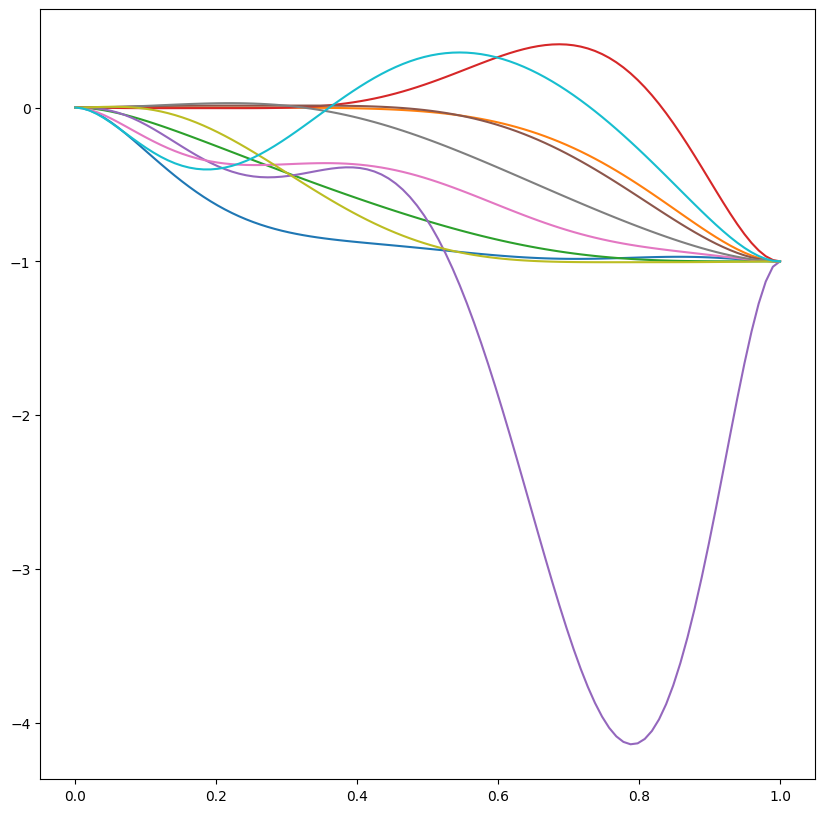

In [9]:
phi_vec = np.linspace(0, 1, 100)
plt.figure(figsize=(10, 10))
for V in Vs:
    plt.plot(phi_vec, V)
plt.show()